## **Assignment 3**

## **Question 1**

Complementary slackness is a concept of linear programming and is related to duality theorem. It states let x be feasible for the primal LP and y be feasible for the dual. Then we have that x and y are optimal solution of their respective LPs if and only if complementary slackness holds.

The Primal Problem aims to:
maximize c * x

subject to Ax <= b, x>=0

The Dual Problem aims to:
minimize b . y

subject to A'y >=c, y>=0

Reference: https://www.matem.unam.mx/~omar/math340/comp-slack.html

In [187]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [188]:
# Let's consider a simple linear programming problem: Maximize: z = 3x + 2y
# Subject to:
# - x >= 0
# - y >= 0
# - 2x + y <= 6
# - x + 2y <= 6

# Creating objective function coefficients
c = np.array([-3, -2])

# Coefficients of inequality constraints (Ax <= b)
A = np.array([[2, 1], [1, 2]])
b = np.array([6, 6])

x_bounds = (0, None)
y_bounds = (0, None)

# Calculating and extracting the primal solution
results_primal = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_results_primal, y_results_primal = results_primal.x

# Dual Problem
c_dual = -b
A_dual = -A.T
b_dual = -c

# Calculating and extracting the dual solution
results_dual = linprog(c_dual, A_ub=A_dual, b_ub=b_dual, bounds=[(0, None), (0, None)], method='highs')
x_results_dual = results_dual.x

primal = np.dot(A, results_primal.x) - b
dual = np.maximum(primal, 0)

# Verifying complementary slackness
complementary_slackness = np.isclose(primal * dual, 0)

# Priniting the variables and solution
print("Primal Problem:")
print(f"Optimal Solution (x, y): ({x_results_primal}, {y_results_primal})")

print("\nDual Problem:")
print(f"Dual Variables: {dual}")

print("\nComplementary Slackness:", complementary_slackness)


Primal Problem:
Optimal Solution (x, y): (2.0, 2.0)

Dual Problem:
Dual Variables: [0. 0.]

Complementary Slackness: [ True  True]


## **Question 2**

In [189]:
# Importing the required packages
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [190]:
# Function to build moon and circles dataset using sklearn
def get_moon(n_samples, noise=0.05):
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise,random_state=6)
    return noisy_moons[0], noisy_moons[1]

def get_donut(n_samples, noise=0.05, factor=0.5):
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor,noise=noise)
    return noisy_circles[0], noisy_circles[1]

# References have been taken from code shared by Professor in Module 6

In [191]:
# Extracting variables for circles dataset
X_circles, y_circles = get_donut(n_samples=100, noise=.05)
y_circles[y_circles == 0] = -1
# Using the sklearn library to split the dataset into training and testing
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(X_circles, y_circles, random_state=0)

In [192]:
# Extracting variables for moon dataset
X_moons, y_moons = get_moon(n_samples=400, noise=0.1)
y_moons[y_moons == 0] = -1
# Using the sklearn library to split the dataset into training and testing
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, random_state=0)

In [193]:
# Plotting function to plot decision boundary
def plot(X, y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], cmap=plt.cm.Paired, alpha=0.8)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    legend_labels = {1: 'Class 1', -1: 'Class 0'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue' if label == 1 else 'red', markersize=10, label=legend_labels[label])
           for label in np.unique(y)]
    plt.legend(handles=handles)

    plt.title(f'SVM Decision Boundary with {kernel} Kernel')
    plt.show()

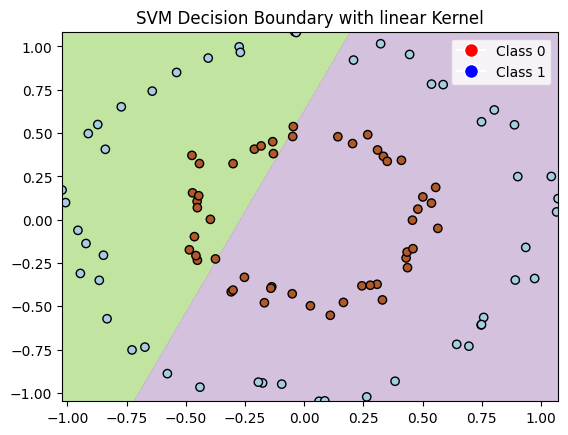

Cross-validated score for linear kernel: 0.45


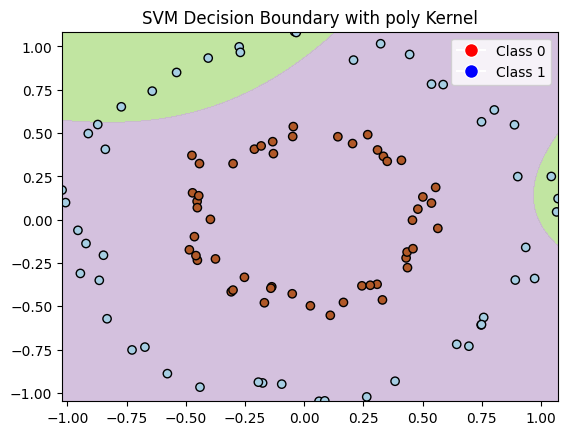

Cross-validated score for poly kernel: 0.57


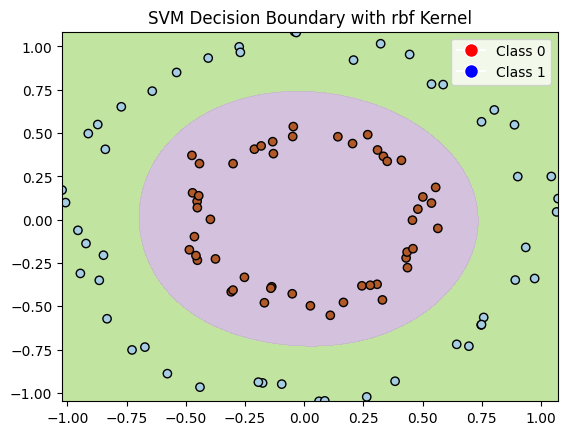

Cross-validated score for rbf kernel: 1.0


In [196]:
# List of kernels to be tested
kernels = ['linear', 'poly', 'rbf']

# Make circles dataset
# Creating an instance of SVC which has been imported from sklearn
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_circles, y_circles)
    # Using the plot function to plot the decision boundary
    plot(X_circles,y_circles)
    # Evaluate performance using k-Fold cross-validation
    scores = cross_val_score(svc, X_circles, y_circles, cv=5)
    print(f'Cross-validated score for {kernel} kernel: {scores.mean()}')


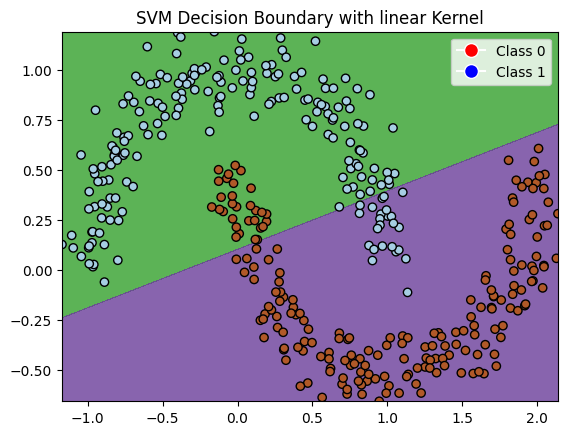

Cross-validated score for linear kernel: 0.8724999999999999


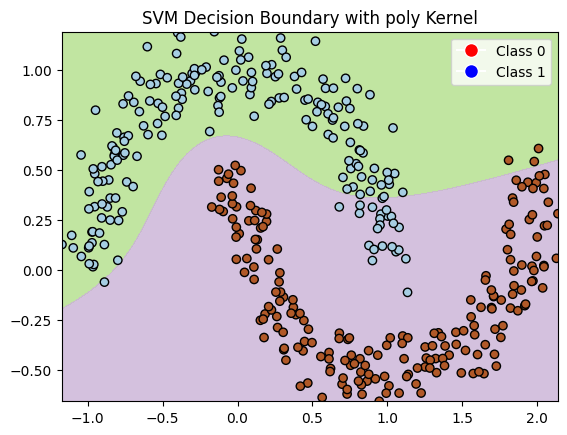

Cross-validated score for poly kernel: 0.9350000000000002


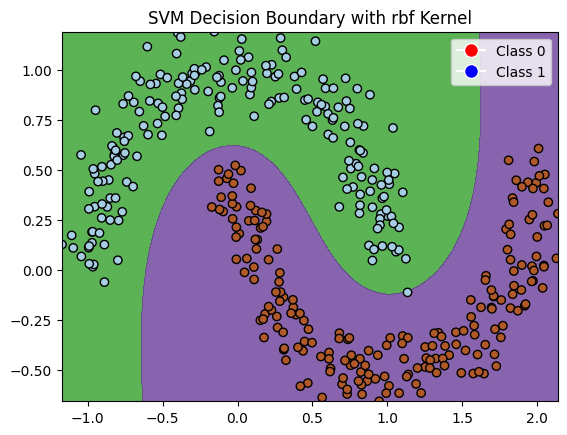

Cross-validated score for rbf kernel: 0.9974999999999999


In [197]:
# List of kernels to be tested
kernels = ['linear', 'poly', 'rbf']

# Make moons dataset
# Creating an instance of SVC which has been imported from sklearn
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_moons, y_moons)
    # Using the plot function to plot the decision boundary
    plot(X_moons,y_moons)
    # Evaluate performance using k-Fold cross-validation
    scores = cross_val_score(svc, X_moons, y_moons, cv=5)
    print(f'Cross-validated score for {kernel} kernel: {scores.mean()}')


# **Observation**

***Best Kernel Function for Circles Dataset:***
For circles dataset, Radial Basis Function (RBF) kernel also known as the Gaussian kernel seems to be the best kernel function. We can also observe from the graph, that it classifies the classes well and builds a complex decision boundary. The RBF kernel basically introduces non-linearity into the SVM, making it capable of capturing complex, curved, or non-linear decision boundaries.

***Best Kernel Function for Moons Dataset:***
For moons dataset, Radial Basis Function (RBF) kernel also known as the Gaussian kernel seems to be the best kernel function. It effectively classifies both the classes and builds a complex non-linear decision boundary. Both the linear and polynomial kernels fail to classify properly in case of this dataset.

## **Question 3**

In [198]:
# Importing the required packages
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [199]:
# Imporing the dataset from make circles package in sklearn
X_circles, y_circles = make_circles(n_samples=1000, factor=0.5 ,noise=0.1, random_state=42)

In [200]:
X_circles

array([[ 0.42249395,  0.20644586],
       [-0.38271006,  0.1584824 ],
       [-0.56839126,  0.30605142],
       ...,
       [-0.05034169, -0.57175038],
       [ 0.63726196, -0.85741166],
       [ 0.27181056,  0.97619727]])

In [201]:
y_circles

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [202]:
# Imporing the dataset from moons package in sklearn
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [203]:
X_moons

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [204]:
y_moons

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [205]:
# Importing Standard Scaler to scale the features
scaler = StandardScaler()
X_circles_transformed = scaler.fit_transform(X_circles)
X_moons_transformed = scaler.fit_transform(X_moons)

In [206]:
# Using the MLPClassifier from sklearn neural_network package to build a MLP classifier

# Building MLPClassifier for circles dataset. On default 'relu' activation function is passed and 'adam' solver is passed.
mlp_circles = MLPClassifier(hidden_layer_sizes=(25,), max_iter=1000, random_state=42)


# Building MLPClassifier for moons dataset. On default 'relu' activation function is passed and 'adam' solver is passed.
mlp_moons = MLPClassifier(hidden_layer_sizes=(25,), max_iter=1000, random_state=42)

In [207]:
# Creating an instance of KFold using 5 splits or folds
kFold = KFold(n_splits=5, shuffle=True, random_state=42)

In [208]:
# Calculating the cross validation scores using the cross_val_score and passing the cross validation object 'kFold' that was built in the last code block.

scores_circles = cross_val_score(mlp_circles, X_circles_transformed, y_circles, cv=kFold)
scores_moons = cross_val_score(mlp_moons, X_moons_transformed, y_moons, cv=kFold)

In [209]:
# Dataset : Circles
# Priniting the scores for cross validation that were complied in the last code block.
print("Cross-Validation Scores for 'make_circles' dataset:")
for i, score in enumerate(scores_circles):
    print(f"Fold {i+1}: {score:.2f}")
print(f"Mean Accuracy: {np.mean(scores_circles):.2f}")

Cross-Validation Scores for 'make_circles' dataset:
Fold 1: 0.97
Fold 2: 0.99
Fold 3: 0.99
Fold 4: 0.99
Fold 5: 1.00
Mean Accuracy: 0.99


In [210]:
# Dataset : Moons
# Priniting the scores for cross validation that were complied in the last code block.
print("\nCross-Validation Scores for 'make_moons' dataset:")
for i, score in enumerate(scores_moons):
    print(f"Fold {i+1}: {score:.2f}")
print(f"Mean Accuracy: {np.mean(scores_moons):.2f}")


Cross-Validation Scores for 'make_moons' dataset:
Fold 1: 1.00
Fold 2: 1.00
Fold 3: 0.99
Fold 4: 0.99
Fold 5: 1.00
Mean Accuracy: 1.00


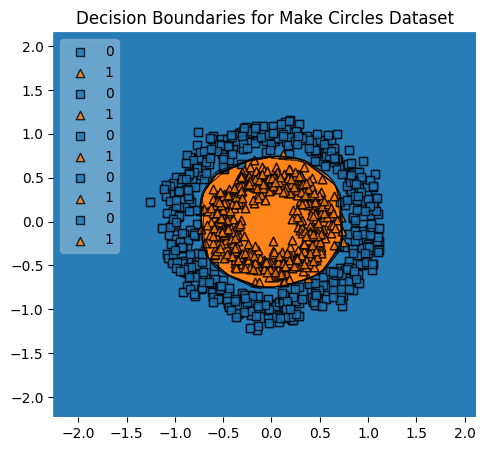

In [211]:
# Plotting decision boundary for circles dataset
# Setting the plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Iterating through each fold using the KFold split function
for i, (train_index, test_index) in enumerate(kFold.split(X_circles)):
    X_train, X_test = X_circles[train_index], X_circles[test_index]
    y_train, y_test = y_circles[train_index], y_circles[test_index]
    # Using the MLPClassifier instance to train the dataset
    mlp_circles.fit(X_train, y_train)
    # Plotting decision boundary
    ax = plot_decision_regions(X_circles, y_circles, clf=mlp_circles, legend=2)
    ax.set_title(f'Fold {i+1}')
# Setting the title
plt.title("Decision Boundaries for Make Circles Dataset")
# Show plot
plt.show()

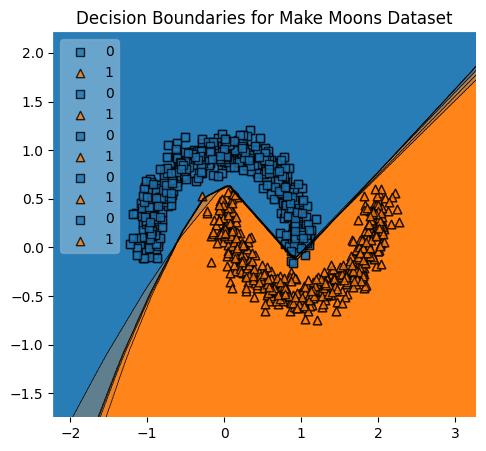

In [212]:
# Plotting decision boundary for moons dataset
# Setting the plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
# Iterating through each fold using the KFold split function
for i, (train_index, test_index) in enumerate(kFold.split(X_moons)):
    X_train, X_test = X_moons[train_index], X_moons[test_index]
    y_train, y_test = y_moons[train_index], y_moons[test_index]
    # Using the MLPClassifier instance to train the dataset
    mlp_moons.fit(X_train, y_train)
    # Plotting decision boundary
    ax = plot_decision_regions(X_moons, y_moons, clf=mlp_moons, legend=2)
    ax.set_title(f'Fold {i+1}')
# Setting the title
plt.title("Decision Boundaries for Make Moons Dataset")
# Show plot
plt.show()

# **Explain rational behind your training process and design parameters:**

The approach taken to build the MLP Classifiers for both the circles and moons dataset was to use the pre-trained sklearn neural networks library and import the MLP Classifier from it. MLP Classifier is capable of understanding complex relationships in data hence this was a good choice to build both the classifers.

While chosing the decision parameters, I build both the classifiers to use 1000 iterations which basically determines the maximum iterations for the solver to converge and for how many epochs will the training go for. The code also uses the default activation function, which is 'relu' or Rectified Linear Unit as it's a common choice when build NN and also introduces non-linearity which is required for both the datasets. Lastly, I am also using the default 'adam' solver as is is a very efficient stochastic gradient-based optimizer. 'adam' solver is also commonly used for training neural networks.

# **Compare SVM and MLP solution in terms of computational cost:**

As seen below, for both datasets, SVM is computationally less expensive than MLP Classifier. Even though MLP Classifier is highly flexible and capable of building complex non-linear boundaries, it comes at the cost of being computationally expensive. In contrast, SVM, with the right kernel (in this case 'rbf'), can classify non-linear decision boundaries more efficiently.

In [162]:
import time

# Comapring computational cost for RBF Kernel SVM and MLPClasifier for both datasets

def computational_cost(X, y):
    # Create and train an SVC model with the 'rbf' kernel
    start_time = time.time()
    svm = SVC(kernel='rbf')
    svm.fit(X, y)
    # Training time
    svm_training_time = time.time() - start_time

    # Prediction time
    start_time = time.time()
    predict = svm.predict(X)
    # Make predictions with the SVC model
    svm_inference_time = time.time() - start_time

    # Train MLPClassifier
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=1000, random_state=42)
    mlp.fit(X, y)
    mlp_training_time = time.time() - start_time

    # Prediction time for MLPClassifier model
    start_time = time.time()
    preidct = mlp.predict(X)
    mlp_inference_time = time.time() - start_time

    # Final time in seconds
    return {
        "SVC Training Time in seconds": svm_training_time,
        "SVC Inference Time in seconds": svm_inference_time,
        "MLP Training Time in seconds": mlp_training_time,
        "MLP Inference Time in seconds": mlp_inference_time,
    }


In [163]:
print("Computational cost for circles dataset")
computational_cost(X_circles_transformed, y_circles)

Computational cost for circles dataset


{'SVC Training Time in seconds': 0.011115550994873047,
 'SVC Inference Time in seconds': 0.0056896209716796875,
 'MLP Training Time in seconds': 1.07460618019104,
 'MLP Inference Time in seconds': 0.0015456676483154297}

In [164]:
print("Computational cost for moons dataset")
computational_cost(X_moons_transformed, y_moons)

Computational cost for moons dataset


{'SVC Training Time in seconds': 0.013446331024169922,
 'SVC Inference Time in seconds': 0.012553930282592773,
 'MLP Training Time in seconds': 2.7239038944244385,
 'MLP Inference Time in seconds': 0.0007050037384033203}